In [1]:
!pip install prophet
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet


In [3]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("sales.csv", parse_dates=['date'])
df = df.rename(columns={'date': 'ds', 'sales': 'y'})
df.head()


Saving sales.csv to sales (1).csv


,ds,y
0,2023-01-01,120
1,2023-01-02,135
2,2023-01-03,128
3,2023-01-04,140
4,2023-01-05,150


In [4]:
model = Prophet(yearly_seasonality=True)
model.fit(df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
future = model.make_future_dataframe(periods=60)
forecast = model.predict(future)
forecast[['ds','yhat']].tail()


,ds,yhat
114,2023-04-25,0.755388
115,2023-04-26,-471.814314
116,2023-04-27,-916.386143
117,2023-04-28,-1322.393891
118,2023-04-29,-1685.651761


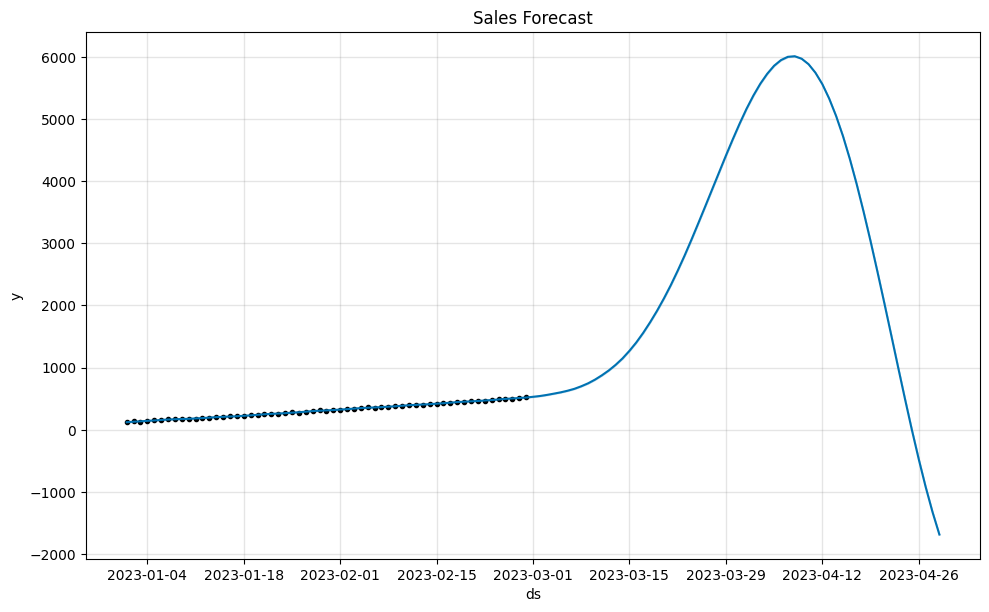

In [6]:
model.plot(forecast)
plt.title("Sales Forecast")
plt.show()


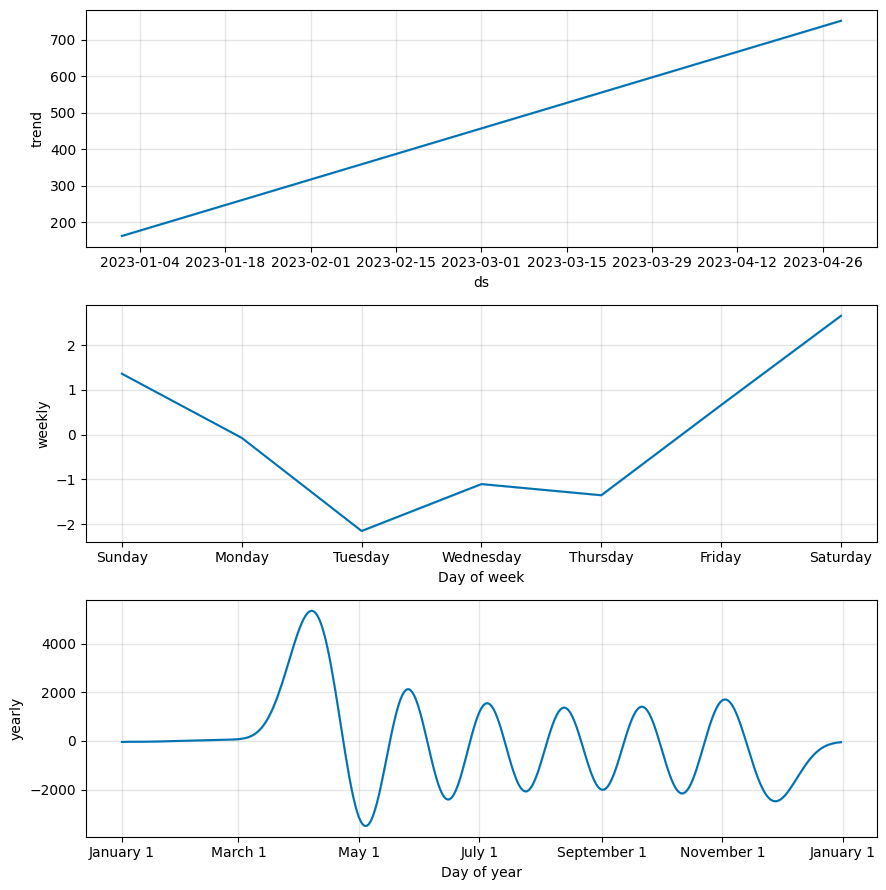

In [7]:
model.plot_components(forecast)
plt.show()


In [8]:
forecast.to_csv("forecast.csv", index=False)
from google.colab import files
files.download("forecast.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>